In [1]:
%matplotlib inline
import importlib

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from scipy.optimize import fmin_l_bfgs_b
from scipy import misc
from scipy.misc import imsave


In [6]:
from keras import metrics
from keras.engine.topology import Input
import tensorflow as tf

In [4]:
def load_show_img(fn):
    #img #Display images
    #img.show() #This will open the image in an application with a new window, use plt.imshow() instead
    img = Image.open(fn)
    plt.imshow(img)
    
gen_rand_img = lambda shape: np.random.uniform(-2.5, 2.5, shape)/100

rn_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32)
def preproc(img):
    return (img - rn_mean)[:, :, :, ::-1]

def postproc(arr, shp):
    return np.clip(arr.reshape(shp)[:, :, :, ::-1] + rn_mean, 0, 255)

# Testing Tensorflow

In [7]:
v = tf.Variable('abc', tf.string)
#dir(v)
print(v)
tf.rank(v)
v = tf.zeros([10, 299, 299, 3])
print(v)
print(tf.rank(v))
print(tf.shape(v))
print(v.shape)
print(type(v.shape))
v.shape[1]
rank_three_tensor = tf.ones([3, 4, 5])
print(rank_three_tensor.shape)
print(rank_three_tensor)
yet_another = tf.reshape(rank_three_tensor, [5, 2, -1]) 
print(v.dtype)

k = tf.constant(42.0)
print('k value: ', k)
print('k type: ', type(k))
ss = tf.get_default_session()
constant = tf.constant([1, 2, 3])
tensor = constant * constant
with tf.Session() as sess:
    print(k.eval())

<tf.Variable 'Variable:0' shape=() dtype=string_ref>
Tensor("zeros:0", shape=(10, 299, 299, 3), dtype=float32)
Tensor("Rank_1:0", shape=(), dtype=int32)
Tensor("Shape:0", shape=(4,), dtype=int32)
(10, 299, 299, 3)
<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(3, 4, 5)
Tensor("ones:0", shape=(3, 4, 5), dtype=float32)
<dtype: 'float32'>
k value:  Tensor("Const:0", shape=(), dtype=float32)
k type:  <class 'tensorflow.python.framework.ops.Tensor'>
42.0


# Test Operations

In [8]:
!ls C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\

train


In [9]:
%ls C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\

 Volume in drive C is Windows
 Volume Serial Number is DA07-7300

 Directory of C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train

03/19/2018  10:13 PM    <DIR>          .
03/19/2018  10:13 PM    <DIR>          ..
01/19/2017  10:33 AM    <DIR>          train
               0 File(s)              0 bytes
               3 Dir(s)  73,204,387,840 bytes free


# Image Generation

In [10]:
%pwd

'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2'

In [11]:
root = 'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2'
dpath = root + '\\data\\imagenet-sample-train\\train'
#root = 'C:/Users/zhang/Documents/fast.ai/fastai_course/neilz/part2'
#dpath = root + '/data/imagenet-sample-train/train'
res_path = root + "\\results\\lesson8"
print(dpath)
print(res_path)

C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\train
C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\results\lesson8


In [12]:
print(dpath)

C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\train


In [13]:
#Check if a directory or file exists
import os
print(os.path.isdir(dpath+'\\n01443537\\'))
print(os.path.exists(dpath+'\\n01443537\\n01443537_1087.jpeg'))

True
True


In [14]:
import glob
path = dpath + '\\**\\*.jpeg'
print(path)
filenames = glob.glob(path, recursive=True)
print('Total files: ', len(filenames))
for i in range(2):
    print(filenames[i])

C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\train\**\*.jpeg
Total files:  19439
C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\train\n01440764\n01440764_10365.JPEG
C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\train\n01440764\n01440764_11155.JPEG


(500, 375)


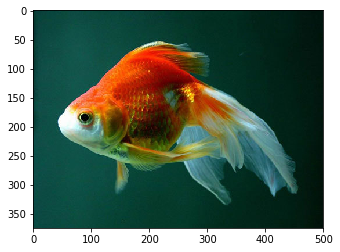

In [16]:
fn = filenames[50]
load_show_img(fn)
img = Image.open(fn)
print(img.size)

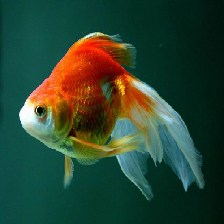

In [17]:
img1 = img.resize((224, 224))
img1

In [585]:
print(np.array(img).shape)
print(np.array(img1).shape)

(375, 500, 3)
(224, 224, 3)


In [586]:
import imageio
pic = imageio.imread(fn)
print(type(pic))
print(pic.shape)
print(pic.dtype)
print(pic[:,:,0])
np.min(pic[:,:,0]), np.max(pic[:,:,0])

<class 'imageio.core.util.Image'>
(375, 500, 3)
uint8
[[ 4  6  8 ...  0  0  0]
 [ 5  6  7 ...  0  0  0]
 [ 6  6  5 ...  1  1  1]
 ...
 [11 11 10 ...  1  1  1]
 [13 13 12 ...  1  1  1]
 [13 13 13 ...  1  1  1]]


(0, 255)

In [587]:
m = np.arange(24).reshape(2,4,3)
a = np.array([1,2,3])
print(m)
print(a)
print(m.shape, a.shape)
m-a

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]]
[1 2 3]
(2, 4, 3) (3,)


array([[[-1, -1, -1],
        [ 2,  2,  2],
        [ 5,  5,  5],
        [ 8,  8,  8]],

       [[11, 11, 11],
        [14, 14, 14],
        [17, 17, 17],
        [20, 20, 20]]])

In [588]:
a = np.array([1,2,3,5,7])
np.clip(a, 2,5)

array([2, 2, 3, 5, 5])

In [589]:
a = np.arange(5)
print(a.shape)
print(np.expand_dims(a,0).shape)
print(np.expand_dims(a,1).shape)
np.expand_dims(a,0)

(5,)
(1, 5)
(5, 1)


array([[0, 1, 2, 3, 4]])

In [590]:
import vgg16_avg; importlib.reload(vgg16_avg)

<module 'vgg16_avg' from 'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2\\vgg16_avg.py'>

In [591]:
from keras import backend as K
from keras.models import Model
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.7
set_session(tf.Session(config=config))

print(K.image_dim_ordering())

tf


In [592]:
#Expect input has the shape of [batch_size, image_width, image_height, channels]
model = vgg16_avg.VGG16_Avg(include_top=False)
print('inputs: ', model.input)
ii = [model.input]
print('ii type: ', type(ii), ii)
print('inputs: ', model.inputs)
print('outputs: ', model.outputs)
print('layers: ')
for layer in model.layers:
    print(layer)

inputs:  Tensor("input_13:0", shape=(?, 224, 224, 3), dtype=float32)
ii type:  <class 'list'> [<tf.Tensor 'input_13:0' shape=(?, 224, 224, 3) dtype=float32>]
inputs:  [<tf.Tensor 'input_13:0' shape=(?, 224, 224, 3) dtype=float32>]
outputs:  [<tf.Tensor 'block5_pool_9/AvgPool:0' shape=(?, 7, 7, 512) dtype=float32>]
layers: 


In [593]:
layer_output = model.get_layer('block5_conv1').output
print(layer_output)
print('layer_output type: ', type(layer_output))
print('model.inputs type: ', type(model.inputs), ', len = ', len(model.inputs))
print('model.inputs: ', model.inputs)

Tensor("block5_conv1_9/Relu:0", shape=(?, 14, 14, 512), dtype=float32)
layer_output type:  <class 'tensorflow.python.framework.ops.Tensor'>
model.inputs type:  <class 'list'> , len =  1
model.inputs:  [<tf.Tensor 'input_13:0' shape=(?, 224, 224, 3) dtype=float32>]


In [594]:
img_arr = preproc(np.expand_dims(np.array(img1), 0))
shp = img_arr.shape
print(shp)
print(type(img_arr))

(1, 224, 224, 3)
<class 'numpy.ndarray'>


In [595]:
layer_model = Model(inputs = model.input, outputs = layer_output)
target_content = K.variable(value=layer_model.predict(img_arr))

In [596]:
print(target_content)
print(layer_output)

<tf.Variable 'Variable_63:0' shape=(1, 14, 14, 512) dtype=float32_ref>
Tensor("block5_conv1_9/Relu:0", shape=(?, 14, 14, 512), dtype=float32)


In [597]:
loss = K.mean(metrics.mse(target_content, layer_output))  # fmin_l_bfgs_b expects a floating number from function all
gradients = K.gradients(loss, model.inputs)
print(type(loss), loss, '\n', type(gradients), gradients)

loss_f = K.function(model.inputs, [loss])
grad_f = K.function(model.inputs, gradients)
fn = K.function([model.input], [loss]+gradients)
print('fn: ', type(fn), fn, type([loss]+gradients))
print(type(loss_f), type(grad_f))

<class 'tensorflow.python.framework.ops.Tensor'> Tensor("Mean_245:0", shape=(), dtype=float32) 
 <class 'list'> [<tf.Tensor 'gradients_67/block1_conv1_9/convolution_grad/Conv2DBackpropInput:0' shape=(?, 224, 224, 3) dtype=float32>]
fn:  <class 'keras.backend.tensorflow_backend.Function'> <keras.backend.tensorflow_backend.Function object at 0x000002C478FBC400> <class 'list'>
<class 'keras.backend.tensorflow_backend.Function'> <class 'keras.backend.tensorflow_backend.Function'>


In [655]:

#N.B. Need this class to transfer the input from a 1-D array to a list with correct shape into loss function,
# which calls the model. Also need to transfer the output to float64 value for loss and gradients. 
#Using K.function along won't achieve such goals.
class Evaluator(object):
    def __init__(self, fn, shap):
        self.fn = fn
        self.shap = shap
        
    def loss(self, x):
        #print('calculating loss....')
        #print('x: ', x.shape)
        kk = x.reshape(self.shap)
        #print('kk : ', kk.shape)
        #N.B. Need to pass in a list or tuple to function
        _loss, self.grads = self.fn([x.reshape(self.shap)])
        #print('loss ret shape before: ', type(_loss), _loss)
        _loss = np.array(_loss).flatten()
        _loss = _loss.astype(np.float64)
        #print('finished calculating loss.')
        #print('loss ret shape: ', type(_loss), _loss)
        return _loss
    def grad(self, x):
        #print('calculating grad....')
        ret = self.grads
        #print('grad ret shape before: ', type(ret), len(ret), ret[0].shape)
        # N.B. Need to make the data type float64, Otherwise you'll see error as below from fmin_l_bfgs_b() call
        # ValueError: failed to initialize intent(inout) array -- expected elsize=8 but got 4
        ret = np.array(ret).flatten().astype(np.float64) 
        
        
        #print('grad ret shape: ', type(ret), ret.shape)
        #print ('finished calculating grad.')
        return ret
    


In [606]:
def Solve(evalobj, x, iter_num, img_name):
    for i in range(iter_num):
        print('x :', type(x), x.shape, x.flatten().shape)
        x, func_v, info = fmin_l_bfgs_b(evalobj.loss, x.flatten(), fprime=evalobj.grad, maxiter=20)
        print('Iteration ', i, ', Loss value at minimum: ', func_v)
    imageio.imwrite(f'{res_path}/{img_name}', postproc(x.copy(), shp)[0].astype('uint8'))
    


rand_img type:  <class 'PIL.Image.Image'>
rand_img_arr type:  <class 'numpy.ndarray'> (1, 224, 224, 3)
flatten type:  <class 'numpy.ndarray'> (150528,)
shp:  (1, 224, 224, 3)
mm type:  <class 'numpy.ndarray'> (1, 224, 224, 3)
x type:  <class 'numpy.ndarray'> (1, 224, 224, 3)


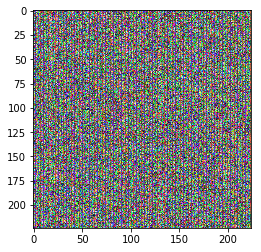

In [600]:
#shp = np.array(img1).shape
#rand_nums = np.random.uniform(0,255,shp)
#print(shp)
rand_img = Image.fromarray(rand_nums, 'RGB')
#rand_img
plt.imshow(rand_img)
print('rand_img type: ', type(rand_img))
rand_img_arr = preproc(np.expand_dims(np.array(rand_img), 0))
print('rand_img_arr type: ', type(rand_img_arr), rand_img_arr.shape)
flatten = rand_img_arr.flatten()
print('flatten type: ', type(flatten), flatten.shape)
mm  = flatten.reshape(shp)
print('shp: ', shp)
print('mm type: ', type(mm), mm.shape)
x = gen_rand_img(shp)
print('x type: ', type(x), x.shape)


In [608]:
evalu = Evaluator(fn, shp)    
#N.B. If I use sum(metrics.mse) I don't get as good results with iterations of 20, I need goto 100 to get good results.
#If however I changed to K.mean(metrics.mse), I can easily get convergence with iterations of 20.
Solve(evalu, rand_img_arr, 20, 'content_recreation.png')    

x : <class 'numpy.ndarray'> (1, 224, 224, 3) (150528,)
Iteration  0 , Loss value at minimum:  [51.73192215]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  1 , Loss value at minimum:  [24.17014122]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  2 , Loss value at minimum:  [15.10501862]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  3 , Loss value at minimum:  [10.82068348]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  4 , Loss value at minimum:  [8.6143446]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  5 , Loss value at minimum:  [7.40689707]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  6 , Loss value at minimum:  [6.48435402]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  7 , Loss value at minimum:  [5.80254126]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  8 , Loss value at minimum:  [5.2818222]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  9 , Loss value at minimum:  [4.8

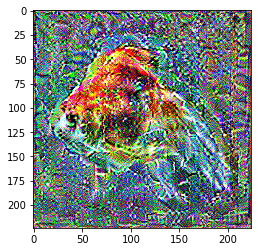

In [609]:
load_show_img(res_path+"\\content_recreation.png")

# Recreate Style

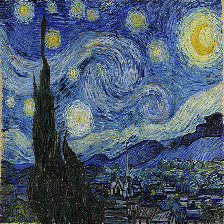

In [620]:
style_img = Image.open(root+"\\data\\606px-Van_Gogh_Starry_Night.jpg")
style_img = style_img.resize((224, 224))
style_img

In [621]:
style_model = vgg16_avg.VGG16_Avg(include_top=False)

In [622]:
style_img_arr = preproc(np.expand_dims(np.array(style_img), 0))
style_shp = style_img_arr.shape
print(style_shp)
print(type(style_img_arr))

(1, 224, 224, 3)
<class 'numpy.ndarray'>


In [623]:
conv_layers_output = [la.output for la in style_model.layers if 'conv1' in la.name][:-2]
for c in conv_layers_output:
    print(c.name)

block1_conv1_10/Relu:0
block2_conv1_10/Relu:0
block3_conv1_10/Relu:0


In [624]:
style_layer_model = Model(inputs=style_model.inputs, outputs=conv_layers_output)
style_target = [K.variable(t) for t in style_layer_model.predict(style_img_arr)]

In [625]:
print('style_target: ', type(style_target), len(style_target), style_target)
print('conv_layers_output: ', type(conv_layers_output), len(conv_layers_output))

style_target:  <class 'list'> 3 [<tf.Variable 'Variable_64:0' shape=(1, 224, 224, 64) dtype=float32_ref>, <tf.Variable 'Variable_65:0' shape=(1, 112, 112, 128) dtype=float32_ref>, <tf.Variable 'Variable_66:0' shape=(1, 56, 56, 256) dtype=float32_ref>]
conv_layers_output:  <class 'list'> 3


In [626]:
def gram_matrix(x):
    permed = K.permute_dimensions(x, [2, 0, 1])
    features = K.batch_flatten(permed)
    res = K.dot(features, K.transpose(features)) / x.get_shape().num_elements()
    return res

In [627]:
ss = style_target[0]
print('ss : ', type(ss), ss)
print(ss.get_shape())
print(ss.get_shape().num_elements())
x = ss[0]
permed = K.permute_dimensions(x, [2, 0, 1])
print('permed :', permed.shape)
features = K.batch_flatten(permed)
print('features :', features.shape, features)
res = K.dot(features, K.transpose(features))
print(res)
print(features.get_shape().num_elements())

ss :  <class 'tensorflow.python.ops.variables.Variable'> <tf.Variable 'Variable_64:0' shape=(1, 224, 224, 64) dtype=float32_ref>
(1, 224, 224, 64)
3211264
permed : (64, 224, 224)
features : (?, ?) Tensor("Reshape_93:0", shape=(?, ?), dtype=float32)
Tensor("MatMul_77:0", shape=(?, ?), dtype=float32)
None


In [628]:
def calc_style_loss(targ, obj):
    return K.mean(metrics.mse(gram_matrix(targ), gram_matrix(obj)))

In [629]:
style_loss = K.sum([calc_style_loss(t[0], o[0]) for t,o in zip(style_target, conv_layers_output)])
style_grads = K.gradients(style_loss, style_model.inputs)
print('style_loss: ', type(style_loss), style_loss)
print('style_grads: ', type(style_grads), len(style_grads), type(style_grads[0]), style_grads[0])

style_loss:  <class 'tensorflow.python.framework.ops.Tensor'> Tensor("Sum_16:0", shape=(), dtype=float32)
style_grads:  <class 'list'> 1 <class 'tensorflow.python.framework.ops.Tensor'> Tensor("gradients_73/block1_conv1_10/convolution_grad/Conv2DBackpropInput:0", shape=(?, 224, 224, 3), dtype=float32)


In [630]:
style_loss_fn = K.function(style_model.inputs, [style_loss])
style_grads_fn = K.function(style_model.inputs, style_grads)
style_fn = K.function([style_model.input], [style_loss]+style_grads)

rand_img type:  <class 'PIL.Image.Image'>
style_rand_img_arr type:  <class 'numpy.ndarray'> (1, 224, 224, 3)
style_shp:  (1, 224, 224, 3)


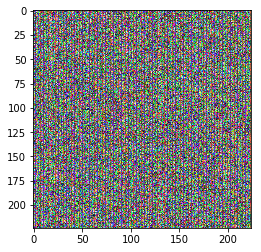

In [640]:
style_rand_img = Image.fromarray(rand_nums, 'RGB')
#rand_img
plt.imshow(style_rand_img)
print('rand_img type: ', type(style_rand_img))
style_rand_img_arr = preproc(np.expand_dims(np.array(style_rand_img), 0))
print('style_rand_img_arr type: ', type(style_rand_img_arr), style_rand_img_arr.shape)
print('style_shp: ', style_shp)
style_evalu = Evaluator(style_fn, style_shp)  

In [632]:
Solve(style_evalu, style_rand_img_arr, 20, "style_recreation.png") 

x : <class 'numpy.ndarray'> (1, 224, 224, 3) (150528,)
Iteration  0 , Loss value at minimum:  [267.27267456]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  1 , Loss value at minimum:  [113.0693512]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  2 , Loss value at minimum:  [71.50765991]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  3 , Loss value at minimum:  [50.03752518]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  4 , Loss value at minimum:  [37.0899086]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  5 , Loss value at minimum:  [27.14522934]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  6 , Loss value at minimum:  [20.1763649]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  7 , Loss value at minimum:  [15.85752296]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  8 , Loss value at minimum:  [13.07268143]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  9 , Loss value at minimum:

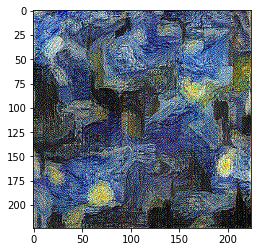

In [633]:
load_show_img(res_path+"\\style_recreation.png")

# Style Transfer

In [652]:
#N.B. You need use one model to get the contents and style from two images. 
#If you use two models, it won't work.

fn = filenames[50]
content_img = Image.open(fn)
content_img = content_img.resize((224,224))
content_img_arr = preproc(np.expand_dims(np.array(content_img), 0))
style_img_arr = preproc(np.expand_dims(np.array(style_img), 0))
shp = content_img_arr.shape

tot_model = vgg16_avg.VGG16_Avg(include_top=False)
conv_layers_output = [la.output for la in tot_model.layers if 'conv1' in la.name][:-2]
style_layer_model = Model(inputs=tot_model.inputs, outputs=conv_layers_output)
style_target = [K.variable(t) for t in style_layer_model.predict(style_img_arr)]

layer_output = tot_model.get_layer('block5_conv1').output
content_model = Model(inputs=tot_model.inputs, outputs=layer_output)
content_target = K.variable(content_model.predict(content_img_arr))

print(len(style_target))
print(conv_layers_output)
print(layer_output)
print(content_target)
style_weights = [0.1, 0.3, 0.6]
style_w = 0.1
total_loss = style_w * K.sum([calc_style_loss(t[0], o[0])*w for t,o,w in zip(style_target, conv_layers_output, style_weights)])
total_loss += K.mean(metrics.mse(content_target, layer_output))*(1-style_w)


total_grads = K.gradients(total_loss, tot_model.inputs)
total_fn = K.function([tot_model.input], [total_loss]+total_grads)
print('total loss: ', total_loss)

3
[<tf.Tensor 'block1_conv1_12/Relu:0' shape=(?, 224, 224, 64) dtype=float32>, <tf.Tensor 'block2_conv1_12/Relu:0' shape=(?, 112, 112, 128) dtype=float32>, <tf.Tensor 'block3_conv1_12/Relu:0' shape=(?, 56, 56, 256) dtype=float32>]
Tensor("block5_conv1_12/Relu:0", shape=(?, 14, 14, 512), dtype=float32)
<tf.Variable 'Variable_70:0' shape=(1, 14, 14, 512) dtype=float32_ref>
total loss:  Tensor("add_15:0", shape=(), dtype=float32)


In [656]:
img_name = 'style_transfer.png'
print('style_rand_img_arr: ', style_rand_img_arr.shape, style_shp)
tot_evalu = Evaluator(total_fn, style_shp)  
Solve(tot_evalu, style_rand_img_arr, 20, img_name) 

style_rand_img_arr:  (1, 224, 224, 3) (1, 224, 224, 3)
x : <class 'numpy.ndarray'> (1, 224, 224, 3) (150528,)
Iteration  0 , Loss value at minimum:  [79.76389313]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  1 , Loss value at minimum:  [39.44894791]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  2 , Loss value at minimum:  [29.38603592]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  3 , Loss value at minimum:  [24.93379974]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  4 , Loss value at minimum:  [22.81412888]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  5 , Loss value at minimum:  [21.48301697]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  6 , Loss value at minimum:  [20.45936203]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  7 , Loss value at minimum:  [19.67889404]
x : <class 'numpy.ndarray'> (150528,) (150528,)
Iteration  8 , Loss value at minimum:  [18.98318863]
x : <class 'numpy.ndarray'> (

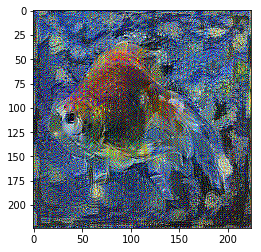

In [657]:
load_show_img(res_path+"\\" + img_name)

# Use content loss to create a super-resolution network

In [18]:
root

'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2'

In [19]:
import bcolz
arr_lr = bcolz.open(root+'\\data\\trn_resized_72_r.bc')[:]

In [20]:
arr_lr.shape

(9719, 72, 72, 3)

9719


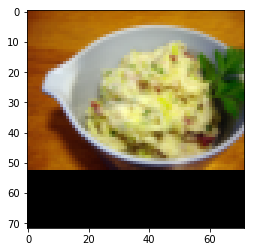

In [33]:
print(len(arr_lr))
plt.imshow(arr_lr[10].astype('uint8'));

In [22]:
import bcolz
arr_hr = bcolz.open(root+'\\data\\trn_resized_288_r.bc')[:]

9719


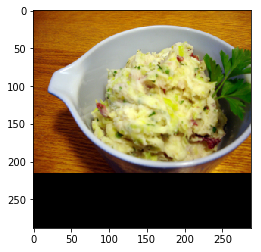

In [34]:
print(len(arr_hr))
plt.imshow(arr_hr[10].astype('uint8'));

In [26]:
def generate_reduced_bcolz_arr(arr):
    sh = arr.shape
    print(sh)
    arr_r = arr[:int(sh[0]/2)]
    print(arr_r.shape)
    return arr_r

def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()
    
#save_array(root+'\\data\\trn_resized_288_r.bc', arr_hr_r)
#save_array(root+'\\data\\trn_resized_72_r.bc', arr_lr[:9719])